In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 绽放反应  

## 伤害计算公式  
$$反应基础伤害 * 等级系数 * 反应基础倍率 * (1 + \frac{16*精通}{2000+精通} + 反应伤害提升) * 抗性 * 额外收益$$

- 等级系数：角色等级当然越高越好
- 反应基础倍率：绽放=2,超/烈绽放=3
- 反应伤害提升：如花海四件套效果
- 额外收益：如草神2命带来的暴击期望

## 精通收益与圣遗物  

### 公式与精通有关的部分  
$$\frac{16*精通}{2000+精通}$$

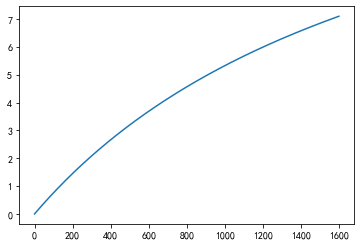

In [33]:
x = np.arange(0, 1600)
plt.plot(x, (16*x)/(2000+x))
plt.show()

因乐园套增加反应伤害,于是带上反应伤害  
$$\frac{16*精通}{2000+精通} + 反应伤害$$
以发射器的圣遗物选择精精精(主词条187*3), 武器(4星武器铁峰刺)精通165为例  

- 饰金: 二件套+80 四件套+150(每个不同属性队友+50,按全部不同计算)
$$精通 = 165 + 80 + 150 + 187 * 3 + 副词条精通$$

- 乐园:  
$$精通 = 165 + 80 + 187 * 3 + 副词条精通$$

$$反应伤害 = 0.4 * (1 + 0.25 * n) \quad \forall n\in{0,1,2,3,4}$$

- 2+2:  
$$精通 = 165 + 80 * 2 + 187 * 3 + 副词条精通$$

### 圣遗物副词条精通上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|----|----|----|
| 16 19 21 32 | 32-46 | 48-69 | 64-92 | 80-115 | 96-138 |

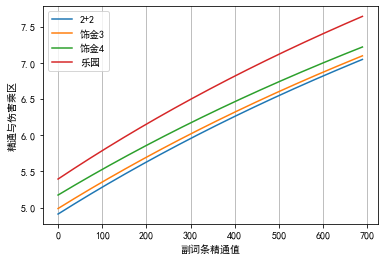

In [34]:
subEM = np.arange(0, 138 * 5)
em1 = 165 + 80*2 + 187*3 + subEM
em2= 165 + 80 + 100 + 187*3 + subEM
em3 = 165 + 80 + 150 + 187*3 + subEM
em4 = 165 + 80 + 187*3 + subEM
plt.plot(subEM, (16 * em1)/(2000 + em1), label = '2+2')
plt.plot(subEM, (16 * em2)/(2000 + em2), label = '饰金3')
plt.plot(subEM, (16 * em3)/(2000 + em3), label = '饰金4')
plt.plot(subEM, (16 * em4)/(2000 + em4) + 0.8, label = '乐园')
plt.xlabel('副词条精通值')
plt.ylabel('精通与伤害乘区')
plt.legend()
plt.grid(axis='x')
plt.show()

## 妮绽放(原绽放)

### 妮露生命值计算
**需求: >74444HP**  

| 加成方式(全满级) | 生命加成 |
|---|---|
| 基础生命值 | 15184 |
| 等级突破加成 | 28.8% |
| 圣遗物主属性-花 | 4780 |
| 圣遗物主属性-杯 | 46.6% |
| 圣遗物主属性-沙 | 46.6% |
| 圣遗物主属性-冠 | 46.6% |
| 圣遗物2件套-千岩 | 20% |
| 圣遗物2件套-花海 | 20% |
| 双水共鸣 | 25% |
| 武器副属性-圣显之钥 | 66.15% |
| 圣遗物副词条-百分比 | a% |
| 圣遗物副词条-数值 | b |

#### 圣遗物副词条生命上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|---|---|---|
| 4.1% 4.7% 5.3% 5.8% | 8.2%-11.6% | 12.3%-17.4% | 16.4%-23.2% | 20.5%-29% | 24.6%-34.8% |
| 209 239 269 299 | 418-598 | 627-897 | 836-1196 | 1045-1495 | 1254-1794 |

In [35]:
# expect
expectHp = 74444

baseHp = 15184 + 4780

# 0+1 2+2
hp1 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3 + 0.2 * 2)
print('双水-生生生-套装2+2-专武:  \t', hp1)

# 0+1 2
hp2 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3 + 0.2)
print('双水-生生生-套装2-专武:   \t', hp2)

# 0+1
hp3 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3)
print('双水-生生生-专武 :        \t', hp3, '\t', (expectHp - hp3)/baseHp)

# 0+0 2+2
hp4 = baseHp * (1 + 0.288 + 0.25 + 0.466 * 3 + 0.2 * 2)
print('双水-生生生-套装2:        \t', hp4, '\t', (expectHp - hp4)/baseHp)

# 0+0
hp5 = baseHp * (1 + 0.288 + 0.25 + 0.466 * 3)
print('双水-生生生:              \t', hp5, '\t', (expectHp - hp5)/baseHp)

双水-生生生-套装2+2-专武:  	 79806.09
双水-生生生-套装2-专武:   	 75813.29000000001
双水-生生生-专武 :        	 71820.49 	 0.13141204167501477
双水-生生生:              	 66599.904 	 0.39291204167501526
双水-生生生:              	 58614.304 	 0.7929120416750152
